<a href="https://colab.research.google.com/github/Kushagrekaushik/Text-Classification/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #I utilized various text classification models available in the Hugging Face Transformers library. I then implemented these models on a dataset designed for classifying emotions in short texts. Subsequently, I evaluated and compared the effectiveness of these models through the Topsis score ranking method. This comparative analysis will be conducted with the assistance of a package I created and shared on PyPI, titled 'Topsis-kushagre-102103612'.

In [2]:
pip install transformers datasets evaluate accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

dataset = load_dataset("jakeazcona/short-text-labeled-emotion-classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating val_iron split: 0 examples [00:00, ? examples/s]

Generating val_neg split: 0 examples [00:00, ? examples/s]

In [4]:
dataset["train"][0]

{'sample': 'i tend to be a window shopper when im alone because theres always going to be a self imposed limit of one or two when im feeling naughty',
 'label': 3}

In [5]:
train_data = dataset["train"]

In [6]:
train_data


Dataset({
    features: ['sample', 'label'],
    num_rows: 24032
})

In [7]:
import pandas as pd

In [8]:
train_df = pd.DataFrame(train_data)

In [9]:
train_df.head()


,sample,label
0,i tend to be a window shopper when im alone be...,3
1,i will hopefully be able to feel less inhibite...,5
2,i feel very fond of my pinky kids,3
3,i feel like i had so much to write then got di...,0
4,i knew i was going to look at the mess and fee...,5


In [10]:
train_df.describe()

,label
count,24032.000000
mean,2.603196
std,1.729178
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [11]:
label_0_df = train_df[train_df['label'] == 0].head(1500)
label_1_df = train_df[train_df['label'] == 1].head(1500)
label_2_df = train_df[train_df['label'] == 2].head(1500)
label_3_df = train_df[train_df['label'] == 3].head(1500)
label_4_df = train_df[train_df['label'] == 4].head(1500)
label_5_df = train_df[train_df['label'] == 5].head(6500)

In [12]:
Data = pd.concat([label_0_df, label_1_df,label_2_df, label_3_df,label_4_df, label_5_df])

Data = Data.sample(frac=1).reset_index(drop=True)

In [13]:
Data.head()

,sample,label
0,i feel when you are a caring person you attrac...,3
1,i feel charming,2
2,i started feeling ugly and started all over again,5
3,i hate complaining all the time but it s so sc...,5
4,i was abruptly reminded of why i was feeling s...,1


In [14]:
Data.describe()

,label
count,13423.000000
mean,3.323773
std,1.826657
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
#Preprocessing
def preprocess_text(text):

    text = text.lower()


    text = text.translate(str.maketrans('', '', string.punctuation))


    tokens = word_tokenize(text)


    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [16]:
import string
import torch
from transformers import BertForSequenceClassification, BertTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, XLNetForSequenceClassification, XLNetTokenizer, AlbertForSequenceClassification, AlbertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
Data['sample'] = Data['sample'].apply(preprocess_text)

In [19]:
Data.head()

,sample,label
0,feel caring person attract caring people life,3
1,feel charming,2
2,started feeling ugly started,5
3,hate complaining time scary feel alone,5
4,abruptly reminded feeling agitated la,1


In [20]:
train_df, test_df = train_test_split(Data, test_size=0.2, random_state=42)

In [21]:
model_names = ["bert-base-uncased", "distilbert-base-uncased", "roberta-base"]


In [22]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from tqdm import tqdm
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score


In [24]:
results_dict = {}

In [25]:
import warnings
warnings.filterwarnings("ignore")
for model_name in model_names:
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # Tokenize and prepare data
    train_texts = train_df['sample'].tolist()
    train_labels = train_df['label'].tolist()

    # Use smaller batches for tokenization
    batch_size = 32
    num_batches = len(train_texts) // batch_size + (len(train_texts) % batch_size != 0)

    predictions = []

    # Use tqdm for a progress bar
    for i in tqdm(range(num_batches), desc=f"Training {model_name}"):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_texts = train_texts[start_idx:end_idx]
        batch_labels = train_labels[start_idx:end_idx]

        tokenized_data = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

        with torch.no_grad():
            logits = model(**tokenized_data).logits

        batch_predictions = torch.argmax(logits, dim=1).tolist()
        predictions.extend(batch_predictions)

    # Evaluate the model on the test set
    test_texts = test_df['sample'].tolist()
    test_labels = test_df['label'].tolist()

    tokenized_test_data = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        logits = model(**tokenized_test_data).logits

    predictions = torch.argmax(logits, dim=1).tolist()

    # Store classification report and other metrics in the dictionary
    classification_rep = classification_report(test_labels, predictions, output_dict=True)
    accuracy = accuracy_score(test_labels, predictions)
    precision_weighted = precision_score(test_labels, predictions, average='weighted')
    recall_weighted = recall_score(test_labels, predictions, average='weighted')
    f1_weighted = f1_score(test_labels, predictions, average='weighted')
    kappa = cohen_kappa_score(test_labels, predictions)

    results_dict[model_name] = {
        "classification_report": classification_rep,
        "accuracy": accuracy,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted,
        "cohen_kappa": kappa,
    }

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted): {recall_weighted:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print("=" * 50)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training bert-base-uncased: 100%|██████████| 336/336 [12:57<00:00,  2.31s/it]


Model: bert-base-uncased
Accuracy: 0.1181
Precision (Weighted): 0.0264
Recall (Weighted): 0.1181
F1 Score (Weighted): 0.0417
Cohen's Kappa: 0.0031


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training distilbert-base-uncased: 100%|██████████| 336/336 [06:20<00:00,  1.13s/it]


Model: distilbert-base-uncased
Accuracy: 0.1233
Precision (Weighted): 0.0272
Recall (Weighted): 0.1233
F1 Score (Weighted): 0.0442
Cohen's Kappa: 0.0131


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training roberta-base: 100%|██████████| 336/336 [12:27<00:00,  2.23s/it]


Model: roberta-base
Accuracy: 0.1073
Precision (Weighted): 0.0115
Recall (Weighted): 0.1073
F1 Score (Weighted): 0.0208
Cohen's Kappa: 0.0000


In [26]:
results_dict

{'bert-base-uncased': {'classification_report': {'0': {'precision': 0.11891620672353237,
    'recall': 0.7476340694006309,
    'f1-score': 0.2051948051948052,
    'support': 317},
   '1': {'precision': 0.11560693641618497,
    'recall': 0.2777777777777778,
    'f1-score': 0.163265306122449,
    'support': 288},
   '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 296},
   '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 298},
   '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 316},
   '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1170},
   'accuracy': 0.1180633147113594,
   'macro avg': {'precision': 0.03908719052328622,
    'recall': 0.1709019745297348,
    'f1-score': 0.0614100185528757,
    'support': 2685},
   'weighted avg': {'precision': 0.026439938629132603,
    'recall': 0.1180633147113594,
    'f1-score': 0.04173823516201809,
    'support': 2685}},
  'accuracy': 0.1180633147113594,
  'precision_weighted

In [27]:
import pandas as pd
results_df = pd.DataFrame(results_dict).T
results_df = results_df.iloc[:, 1:]
results_df.to_csv('Final_results.csv')
print(results_df)

                         accuracy precision_weighted recall_weighted  \
bert-base-uncased        0.118063            0.02644        0.118063   
distilbert-base-uncased  0.123277           0.027213        0.123277   
roberta-base             0.107263           0.011505        0.107263   

                        f1_weighted cohen_kappa  
bert-base-uncased          0.041738    0.003146  
distilbert-base-uncased    0.044191    0.013128  
roberta-base               0.020781         0.0  


In [28]:
pip install Topsis-Divyam-102103142


In [29]:
!topsis Final_results.csv "1,1,1,1,1" "+,+,+,+,+" answer.csv

Divyam Malik's Topsis Implementation
Roll Number: 102103142
Results saved to answer.csv


In [30]:
import pandas as pd


In [31]:
FinalAnswer = pd.read_csv('answer.csv')

In [32]:
FinalAnswer


,Unnamed: 0,accuracy,precision_weighted,recall_weighted,f1_weighted,cohen_kappa,Topsis Score,Rank
0,bert-base-uncased,0.118063,0.026440,0.118063,0.041738,0.003146,0.571795,2.0
1,distilbert-base-uncased,0.123277,0.027213,0.123277,0.044191,0.013128,0.000000,3.0
2,roberta-base,0.107263,0.011505,0.107263,0.020781,0.000000,1.000000,1.0


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

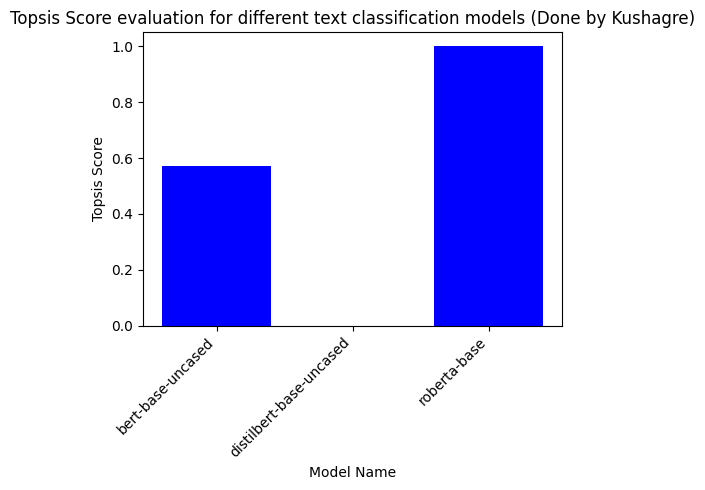

In [34]:
model_names = FinalAnswer['Unnamed: 0']
topsis_scores = FinalAnswer['Topsis Score']

plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models (Done by Kushagre)')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()
